Robert Garbutt
Section 101

# Homework 3: Arrays and Plotting

**Submit this notebook to bCourses to receive a grade for this Workshop.**

Please complete homework activities in code cells in this iPython notebook. Be sure to comment your code well so that anyone who reads it can follow it and use it. Enter your name in the cell at the top of the notebook. When you are ready to submit it, you should download it as a python notebook (click "File", "Download as", "Notebook (.ipynb)") and upload it on bCourses under the Assignments tab.

## Problem 1: Sunspots

[Adapted from Newman, Exercise 3.1] At <a href="http://www-personal.umich.edu/~mejn/computational-physics/sunspots.txt">this link</a> you will find a file called `sunspots.txt`, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first being the month and the second being the sunspot number.

a. Write a program that reads in the data and makes a graph of sunspots as a function of time. Adjust the $x$ axis so that the data fills the whole horizontal width of the graph.

b. Modify your code to display two subplots in a single figure: The plot from Part 1 with all the data, and a second subplot with the first 1000 data points on the graph.

c. Write a function `running_average(y, r)` that takes an array or list $y$ and calculates the running average of the data, defined by 
$$ Y_k = \frac{1}{2r+1} \sum_{m=-r}^r y_{k+m},$$
where $y_k$ are the sunspot numbers in our case. Use this function and modify your second subplot (the one with the first 1000 data points) to plot both the original data and the running average on the same graph, again over the range covered by the first 1000 data points. Use $r=5$, but make sure your program allows the user to easily change $r$.

The next two parts may require you to google for how to do things. Make a strong effort to do these parts on your own without asking for help. If you do ask for help from a GSI or friend, first ask them to point you to the resource they used, and do your best to learn the necessary techniques from that resource yourself. Finding and learning from online documentation and forums is a very important skill. (Hint: Stack Exchange/Stack Overflow is often a great resource.)

d. Add legends to each of your subplots, but make them partially transparent, so that you can still see any data that they might overlap. *Note: In your program, you should only have to change $r$ for the running average in one place to adjust both the graph and the legend.*

e. Since the $x$ and $y$ axes in both subplots have the same units, add shared $x$ and $y$ labels to your plot that are centered on the horizontal and vertical dimensions of your figure, respectively. Also add a single title to your figure.

When your are finished, your plot should look something close to this:

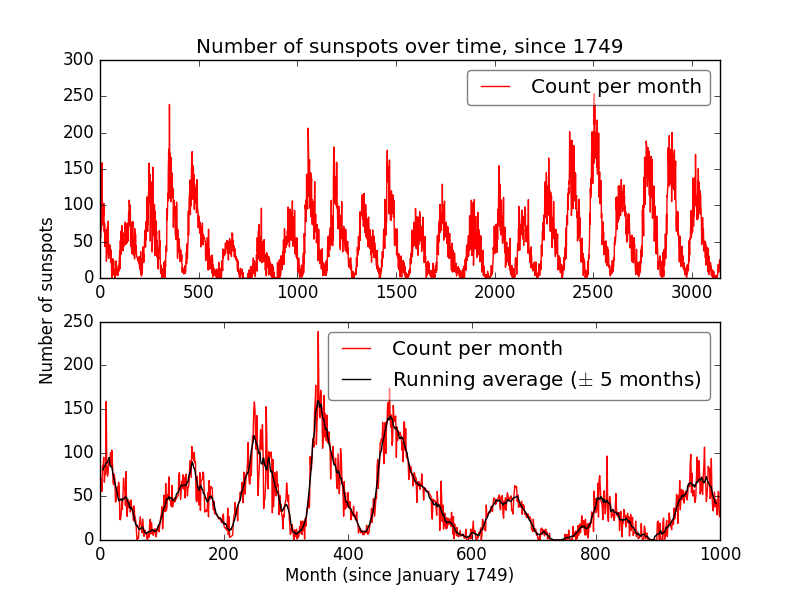

In [5]:
# Don't rerun this snippet of code.
# If you accidentally do, close and reopen the notebook (without saving)
# to get the image back. If all else fails, redownload the notebook.

# from IPython.display import Image
# Image(filename="samplecode/sunspots.png")

#### Hints

* The running average is not defined for the first and last few points that you're taking a running average over. (Why is that?) Notice, for instance, that the black curve in the plot above doesn't extend quite as far on either side as the red curve. For making your plot, it might be helpful if your `running_average` function returns an array of the $x$-values $x_k$ (or their corresponding indices $k$) along with an array of the $y$-values $Y_k$ that you compute for the running average.

* You can use the Latex code `$\pm$` for the $\pm$ symbol in the legend. You can also just write `+/-` if you prefer.


<Figure size 432x288 with 0 Axes>

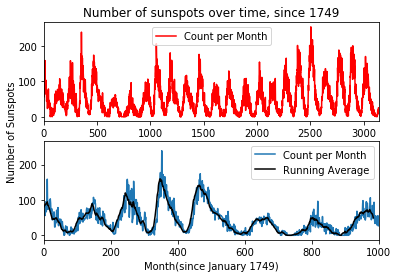

In [3]:

import numpy as np
import matplotlib.pyplot as plt

x = np.loadtxt('sunspots.txt') #Loads the data into an array x

plt.figure()
fig, ax = plt.subplots(2,1,sharey=True) #subplot dimensions with title and x-axis label
ax[0].set_title('Number of sunspots over time, since 1749')
ax[1].set_xlabel('Month(since January 1749)')
fig.text(0.04, 0.5, 'Number of Sunspots', va='center', rotation='vertical')

ax[0].plot(x[:,0],x[:,1],'r') #subplot 1 with respective axes and labels
ax[0].legend(['Count per Month'])
ax[0].set_xlim(0,3142)

handles, labels = ax[1].get_legend_handles_labels()


def running_average(y,r):  #running average functions
    denom = 1/(2*r+1)
    j = []
    list_of_running_averaged_values = []
    for i in range(r,len(y[r:,1])-r):
        for k in range(-r,r+1):
            z = ((y[i+k,1])*denom)
            j.append(z)
        p = sum(j)
        j = []
        list_of_running_averaged_values.append(p)
        
    return list_of_running_averaged_values


o = len(running_average(x[:1000],5)) #x-axis for the running_average
o = range(0, o) 

ax[1].plot(x[:1000,0],x[:1000,1], label='Count per Month') #subplot 2 with respective axes and labels
# ax[1].set_ylabel('Number of sunspots')
ax[1].set_xlim(0,1000)
ax[1].plot(o,running_average(x[:1000],5),'k', label='Running Average')
ax[1].legend()

plt.show()



## Problem 2: Variety Plot

In this problem, you will reproduce the following as a single figure with four subplots, as best you can:

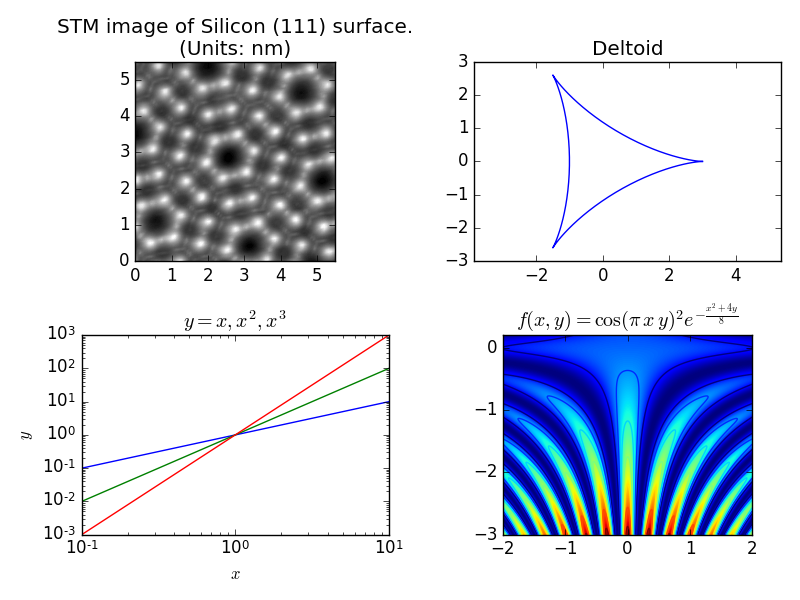

In [1]:
# Don't rerun this snippet of code.
# If you accidentally do, close and reopen the notebook (without saving)
# to get the image back. If all else fails, redownload the notebook.

# from IPython.display import Image
# Image(filename="samplecode/variety_plot.png")

Here are some hints and directions for each one:

**Upper-left:** This is an image of silicon taken with an electron microscope.

You can find the data file [here](http://www-personal.umich.edu/~mejn/computational-physics/stm.txt), among resources for the [Newman](http://www-personal.umich.edu/~mejn/computational-physics/) text.

You may assume that the upper-left of the array is indeed the upper-left of the image.

Both axes should run from 0 to 5.5.

This subplot uses the `gray` colormap.

**Upper-Right:** Matplotlib can plot any list of $(x,y)$ points you give it, including parametric or polar curves. The curve in this subplot is called a "deltoid", and is the result of the equations

$$ \begin{align*}
x &= 2\cos\theta + \cos2\theta \\
y &= 2\sin\theta - \sin2\theta
\end{align*} $$

over a range of $\theta$ from $0$ to $2\pi$.

To get the aspect ratio equal with nice spacing around the curve, try one of the following, depending on how you are making your subplots:
- if you're using `plt.subplot(...)` to get each subplot (the "state-machine" approach), add the `aspect='equal'` and `adjustable='datalim'` arguments to the deltoid subplot, so your command will look something like `plt.subplot(..., aspect='equal', adjustable='datalim')`.
- if you're using `... = plt.subplots(...)` (note the 's'!) or `ax = fig.add_subplot(...)` on a figure `fig` to get subplots with axes objects (the "object-oriented" approach), add the line `ax.set_aspect(aspect='equal', adjustable='datalim')`, where `ax` is the axes object you want to affect.

**Lower-Left:** This kind of plot is called a log-log plot, where both axes are on a logarithmic scale. Google or look in the matplotlib gallery to learn how to make this kind of plot.

The three curves are $y = x$, $y = x^2$, and $y = x^3$, where $x$ ranges over $10^{-1}$ to $10^1$. (Note: You can write powers of ten in python using the shorthand `1e-1` for $10^{-1}$, `1e1` for $10^1$, and so on.)

To make the pretty mathematical labels you see in the sample figure above, you can use
* `r'$y = x, x^2, x^3$'` for the title
* `r'$x$'` for the $x$-axis, and
* `r'$y$'` for the $y$-axis.

Just put these bits of code as you see them (with the **`r`** outside the quotes!) where you would normally put a string for the title or axes labels.

**Lower-Right:** Here you see a density plot with contours of the function

$$f(x,y) = \cos^2(\pi\,x\,y ) e^{-\frac{x^2 + 4 y}{8}},$$

over $x$ from -2 to 2 and $y$ from -3 to 0.2.

Use `meshgrid` to generate the $x$ and $y$ values. Be careful to make sure that the point $(-2,-3)$ is in the bottom left corner of the plot.

You'll need to use both `imshow` and `contour` to generate the density plot and then overlay it with contours. This plot uses the default contour spacing, so you don't need to worry about adjusting that. The colormap is `jet`, matplotlib's current default. (The default colormap will be changing to `viridis` in the next version.)

To get the ticks spaced out like you see here, use matplotlib's `xticks` or `set_xticks` functions for the $x$-axis (depending on how you're making your plots), and similar functions for the $y$-axis. You can pass each of these a single argument: a simple list or array of the numbers you want ticked on each axis.

**Spacing the subplots:** Once all is said and done and you run `plt.show()`, you may notice your plots are cramped and overlapping each other. Add the line `plt.tight_layout()` before `plt.show()`, and matplotlib will space things out in an attempt to avoid overlapping subplots.

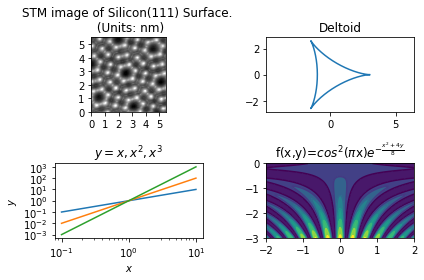

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

UL = np.loadtxt('stm.txt')#Upper Left data

fig, ax = plt.subplots(2,2)                      #Plots the UL graph
ax[0,0].imshow(UL,'gray',extent =[0,5.5,0,5.5])
ax[0,0].set_xticks([0,1,2,3,4,5])
ax[0,0].set_yticks([0,1,2,3,4,5])
ax[0,0].set_title('STM image of Silicon(111) Surface. \n (Units: nm)')

theta = np.linspace(0,2*np.pi,1000)              #Plot of UR graph
x = 2*np.cos(theta)+np.cos(2*theta)
y =2*np.sin(theta)-np.sin(2*theta)
ax[0,1].plot(x,y)
ax[0,1].set_aspect(aspect='equal', adjustable='datalim')
ax[0,1].set_title('Deltoid')


z = np.linspace(.1,10,1000)     #Plot of LL
ax[1,0].loglog(z,z)
ax[1,0].loglog(z,z**2)
ax[1,0].loglog(z,z**3)
ax[1,0].set_title(r'$y = x, x^2, x^3$')
ax[1,0].set_xlabel(r'$x$')
ax[1,0].set_ylabel(r'$y$')
ax[1,0].set_yticks([1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3])


x_value = np.linspace(-2,2,1000)           #LR Graph
y_value = np.linspace(-3,0.2,1000)
X,Y = np.meshgrid(x_value,y_value)
f = np.cos(np.pi*X*Y)**2*np.exp(-(X**2+4*Y)/8)
ax[1,1].contourf(f,extent=[-2,2,-3,0])
ax[1,1].contour(f,extent=[-2,2,-3,0],linestyles='solid')
# ax[1,1].imshow(f,extent=[-2,2,-3,0])
ax[1,1].set_title(r'f(x,y)=$cos^2(\pi$x$)e^{-\frac{x^2+4y}{8}}$') #Fantastic Latex

plt.tight_layout()
plt.show()

## Problem 3: Wind Statistics

In this problem, you'll create a new array that summarizes a larger dataset. In the folder for this Homework assignment, you'll find a dataset "`wind.data`", and a description of the dataset "`wind.desc`". 

Read the description `wind.desc` to understand the format of `wind.data`. Then, write a program which loads the data and generates a new array with the following format: each row should contain the year, month, mean wind speed, min wind speed, and max wind speed, in that order. The means, mins, and maxes should be taken over all days in that particular month, over all the cities that `wind.data` includes. The rows should be in chronological order. Printing your array should give you something like this:

    [[ 61.           1.          11.38064516   0.5         27.71      ]
     [ 61.           2.          13.49235119   2.21        29.63      ]
     [ 61.           3.          11.07236559   1.46        23.45      ]
     ..., 
     [ 78.          10.           9.23389785   0.21        28.21      ]
     [ 78.          11.          12.72102778   0.96        30.21      ]
     [ 78.          12.          12.70357527   0.42        41.46      ]]

Next, plot the means, mins, and maxes over time using just a single `plt.plot()` command, along with whatever other commands you need to label and display the figure. (Hint: What happens when you plot a 2D array?) Be sure to label your figure with proper units, etc. The x-axis may be labeled using year/month or just the years (i.e. have ticks along the axis which are labeled with some of the years, like 1961,1964,1967,1970,etc.). There are several ways to accomplish this. One way is to use `plt.xticks()`, which will give you the most explicit control over which points on the x axis get labeled and what labels they get. To understand this function, check out the documentation for `matplotlib.pyplot.xticks` on the `matplotlib` website.

** Just for fun **

If you look at your plot, you'll notice some periodicity in the wind speeds. To better see the period, use the `running_average` function you wrote for the Sunspots problem to plot the running average of the means, mins, and maxes along with the original curves. Depending on how you wrote your `running_average` function, it may work immediately on this new 2D array without any modifications! From visual inspection of your running average, how long is the period, and when are wind speeds fastest and slowest in Ireland?

#### Hints

Depending on how you do this problem, you may find it useful to use boolean indexing along with numpy's `logical_and` function. It's okay to use lists as intermediate steps in generating your array. That is, not everything has to be an array, though it is possible to do this with only arrays. (Challenge!)



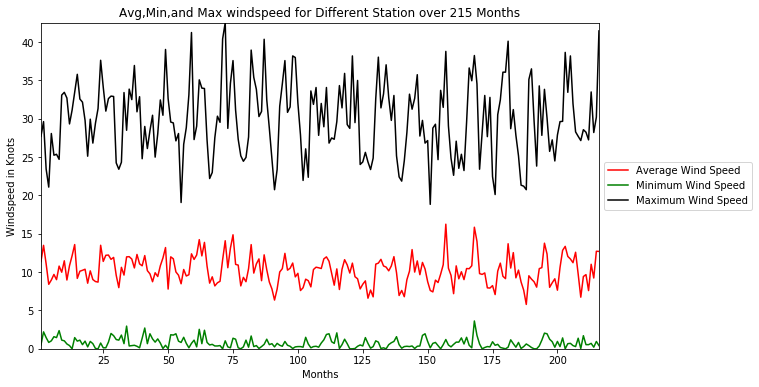

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = np.loadtxt('wind.data',float)

list_of_desired_data = []

#Finding the specified values for the array
for year in range(61,79): #Runs over every specific year
    for month in range(1,13): #Runs over every specific month
        
        #List of needed value counters for each month calc
        min_wind = 1000   #keeps track of lowest wind value
        max_wind = 0      #keeps track of highest wind value
        wind_sum = 0      #summing variable
        counter = 0       #Counter for average at end
        
        array_for_specific_year_and_month = np.logical_and(x[:,0]==year,x[:,1]==month) #Creates and array that is true for specified year and month in loops
        year_month_array = x[array_for_specific_year_and_month]                        #Takes the desired year and month out of our array of data
        
        for day in range(len(year_month_array)):  #Each row of our year/month array
            for windspeed in range(3,15):        #Columns of wind speed data for each day
                wind_sum += year_month_array[day,windspeed]    #sums up all windspeeds for each day
                counter += 1                                   #Makes sure average is correct
                
                if year_month_array[day,windspeed] < min_wind:  #Keeps lowest windspeed
                    min_wind = year_month_array[day,windspeed]
                    
                if year_month_array[day,windspeed] > max_wind:  #Keeps highest windspeed
                    max_wind = year_month_array[day,windspeed]
                
        avg_windspeed = wind_sum/counter    #creates average for each month
        list_of_desired_data.append([year, month, avg_windspeed, min_wind,max_wind])   #tacks on each desired calc for each month and thus generates desired array

plt.figure(figsize = (10, 6))

graph_array=np.array(list_of_desired_data) #Forcing the data into an array to graph

month_values = np.linspace(1,216,216)
plt.plot(month_values, graph_array[:,2], 'r', label='Average Wind Speed') #Graph of each respective data
plt.plot(month_values, graph_array[:,3], 'g', label='Minimum Wind Speed')
plt.plot(month_values, graph_array[:,4], 'k', label='Maximum Wind Speed')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #Puts legend on right, outside of graphs
plt.xlabel('Months')
plt.ylabel('Windspeed in Knots')
plt.title('Avg,Min,and Max windspeed for Different Station over 215 Months')
plt.margins(x=0,y=0)